In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = '../archive/data.csv'
spotify_df = pd.read_csv(path)

spotify_df.head(6)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
5,0.778,0.6320,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.8270,140.951,224029,4,1


In [6]:
import nbformat

%run ../method.py

In [217]:
spotify_df.missing.missing_info()

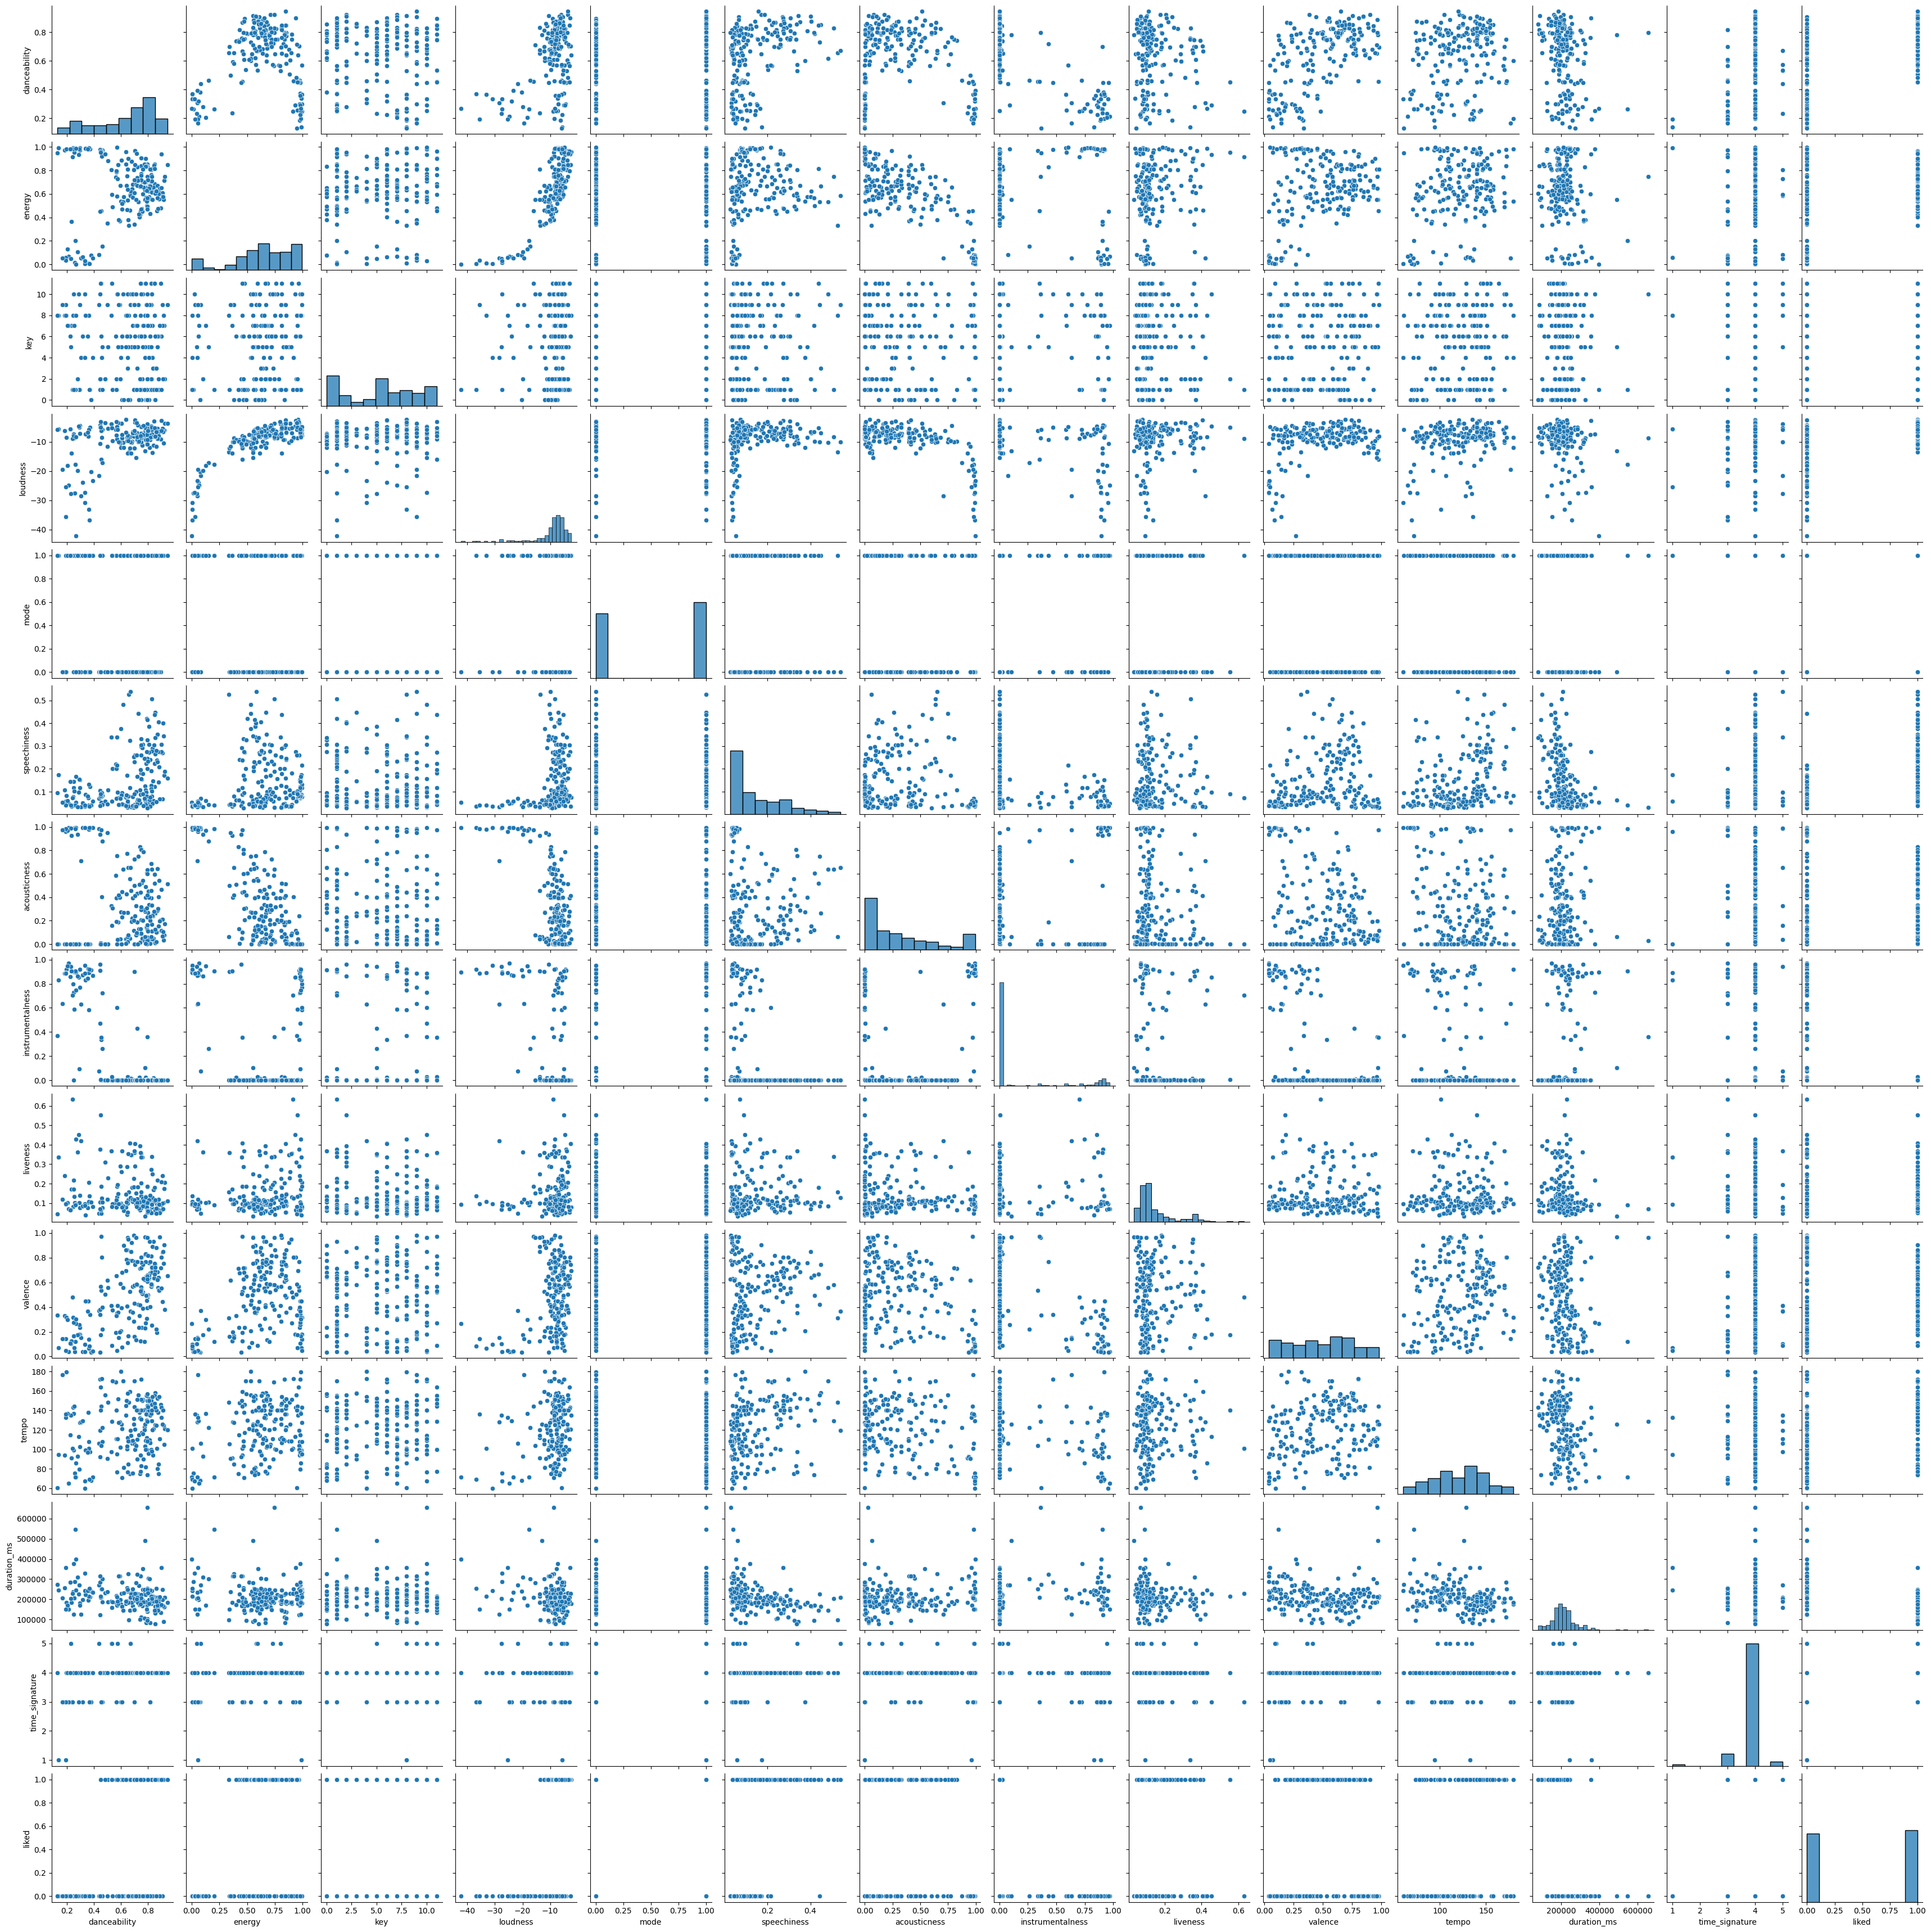

In [5]:
sns.pairplot(
    spotify_df
)

/mnt/d/data_prac/method.py:144: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/mnt/d/data_prac/method.py:144: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/mnt/d/data_prac/method.py:144: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.

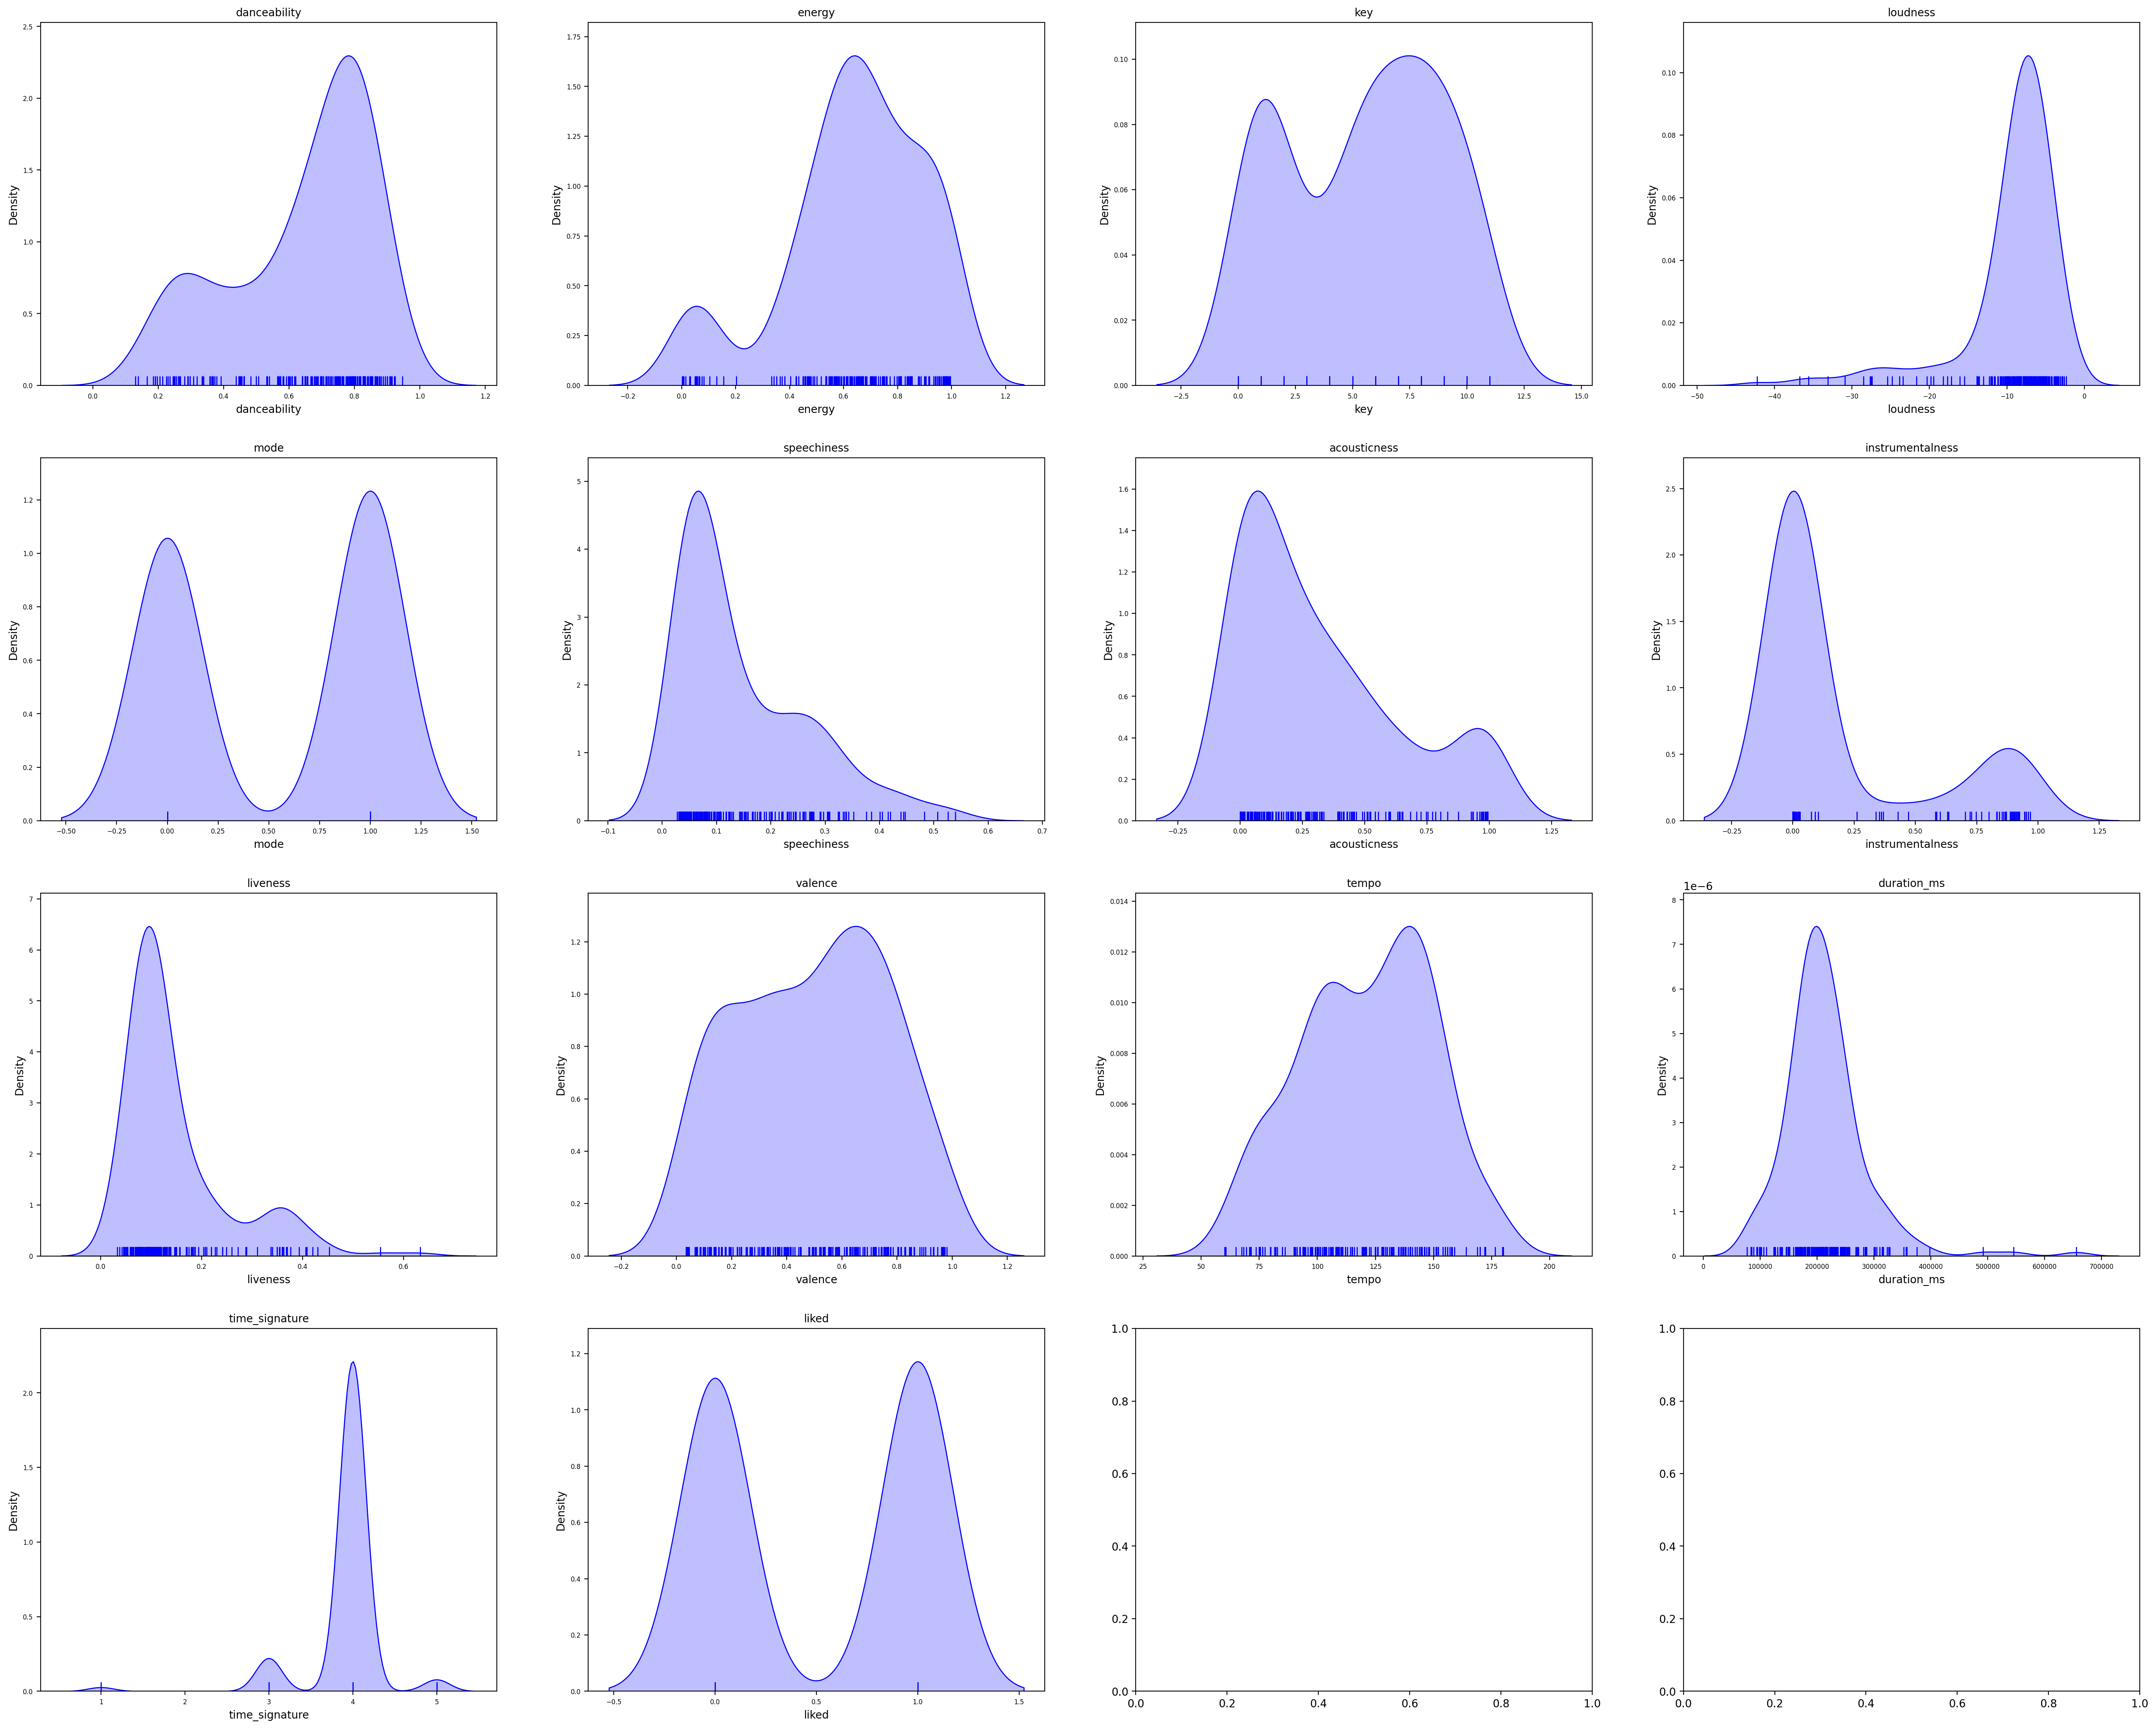

In [6]:
spotify_df.grafic.grafic_number(4,4)

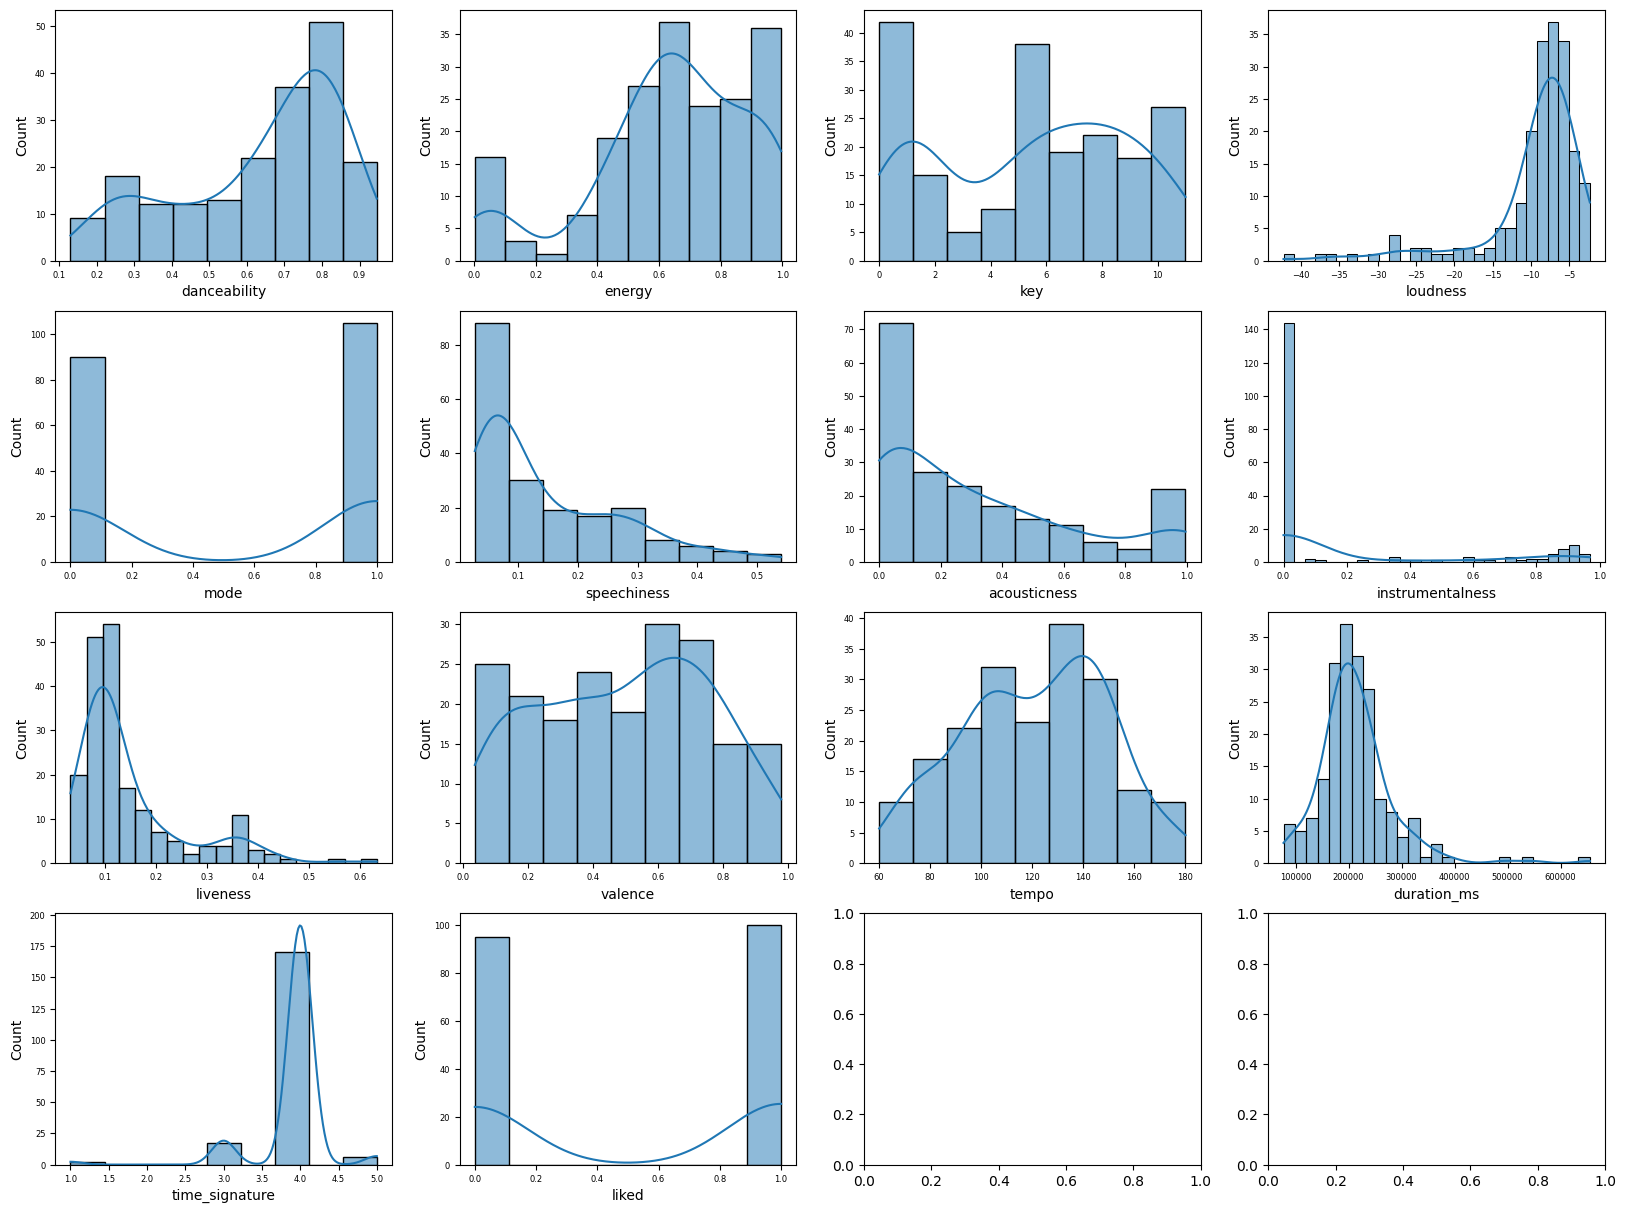

In [8]:
fig, axes = plt.subplots(nrows = 4 ,ncols = 4, figsize = (20,15))
axes = axes.flat

df_cols = spotify_df.columns

for i, cols in enumerate(df_cols):
    sns.histplot(
        x = spotify_df[cols],
        kde=True,
        ax = axes[i]
    )

    # axes[i].set_title(cols, fontsize = 'medium')
    axes[i].tick_params(labelsize = 6)

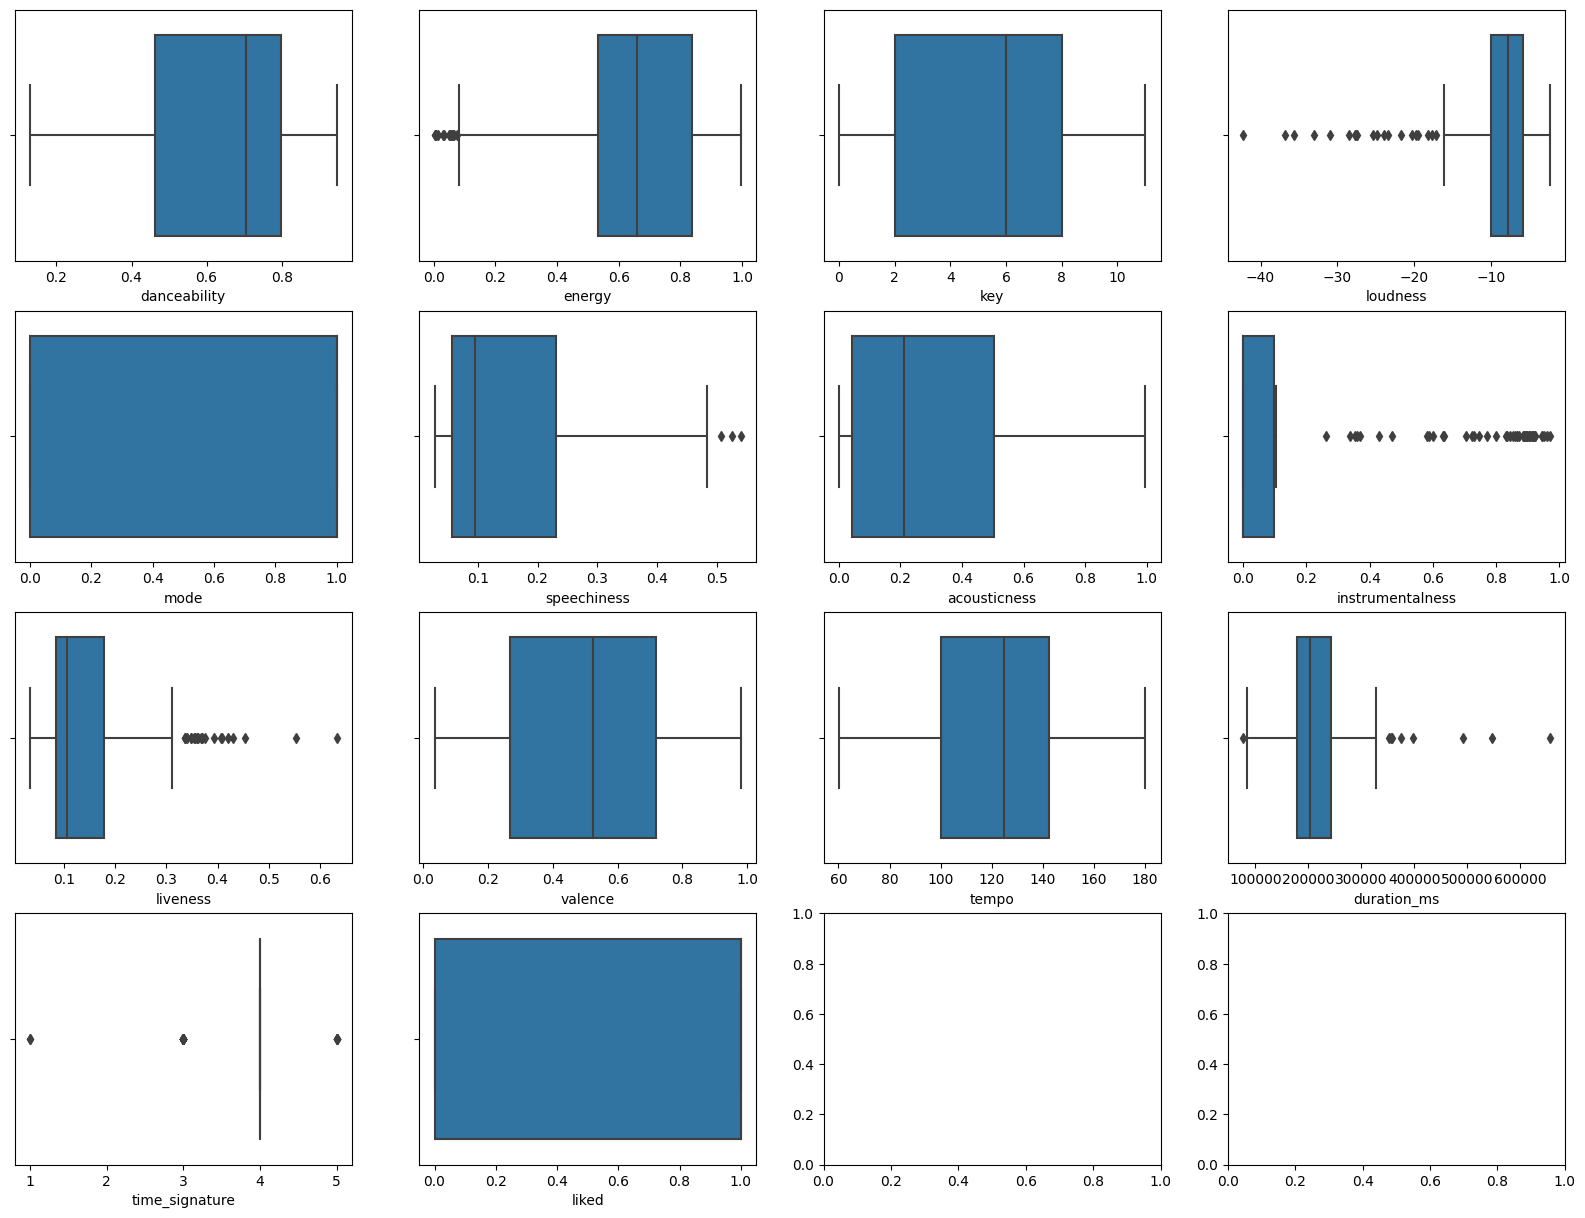

In [ ]:
fig, axes = plt.subplots(nrows = 4 ,ncols = 4, figsize = (20,15))
axes = axes.flat

df_cols = spotify_df.columns

for i, cols in enumerate(df_cols):
    sns.boxplot(
        x = spotify_df[cols],
        ax = axes[i]
    )

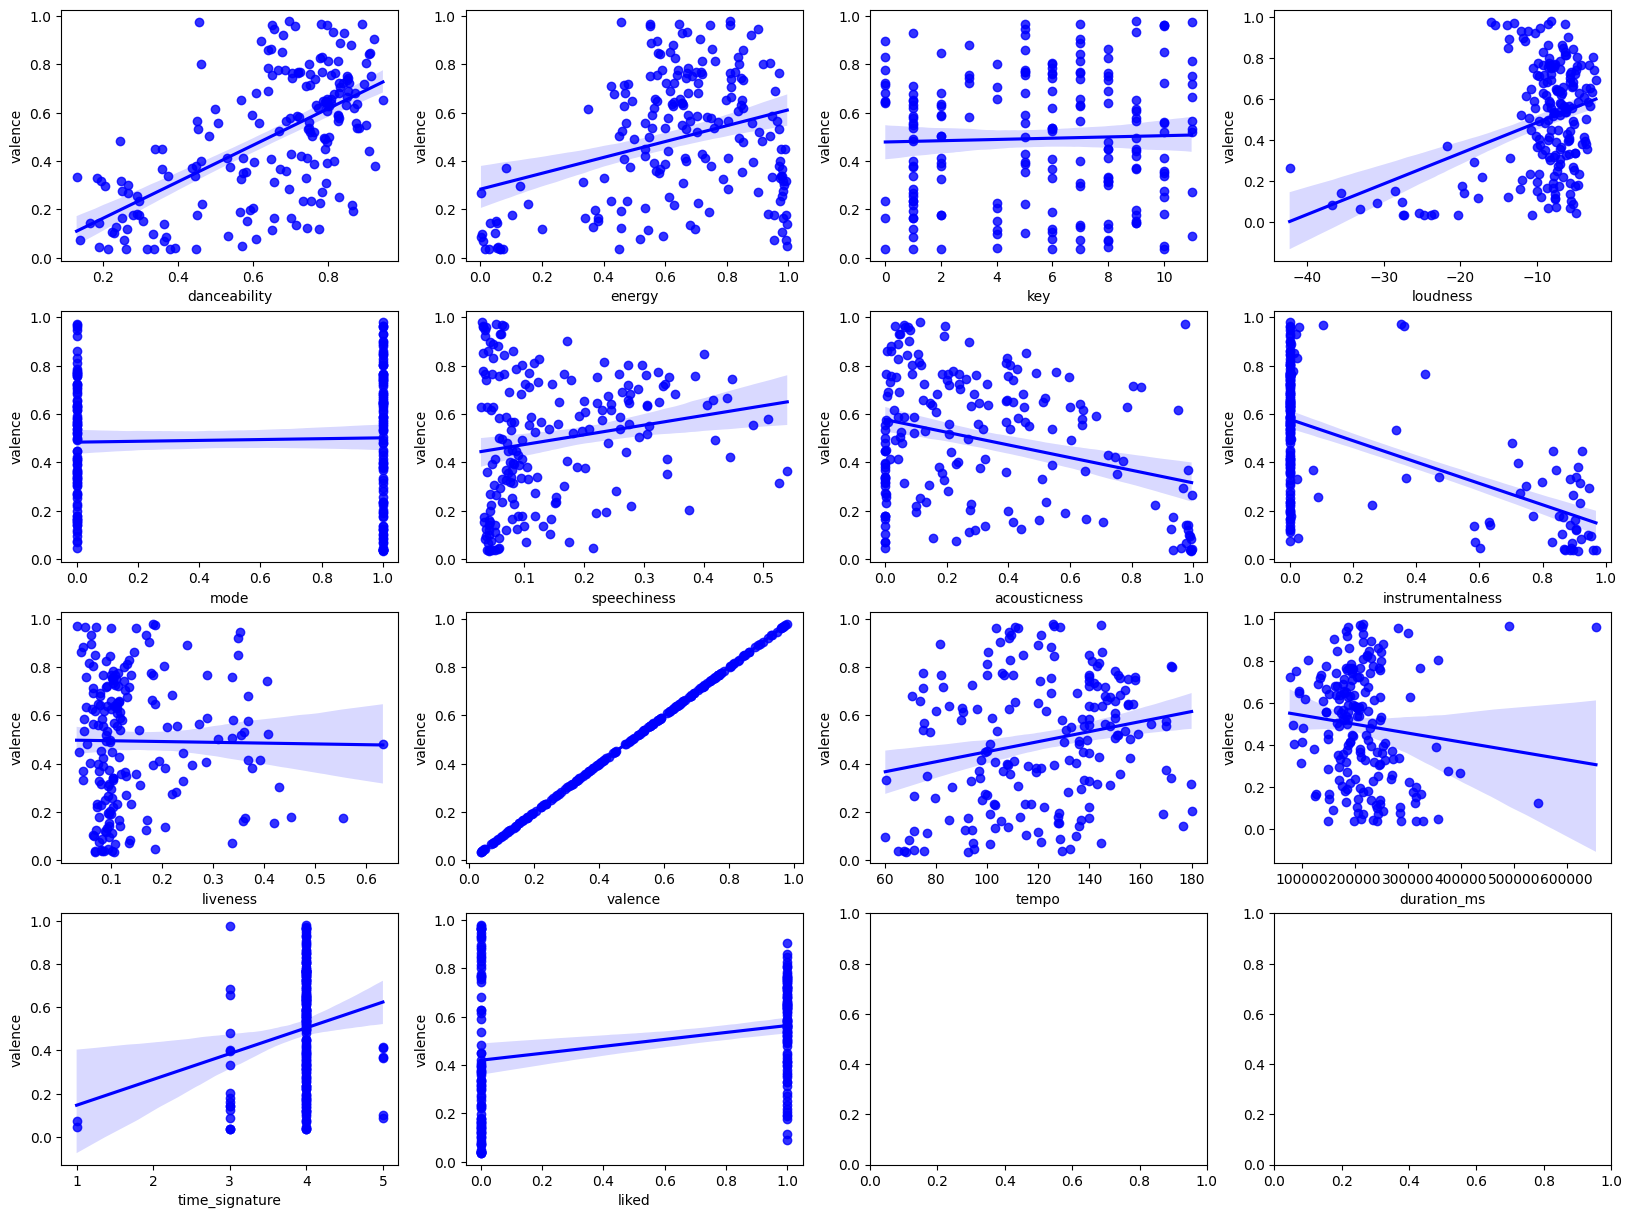

In [ ]:
fig, axes = plt.subplots(nrows = 4 ,ncols = 4, figsize = (20,15))
axes = axes.flat

df_cols = spotify_df.columns

for i, cols in enumerate(df_cols):
    sns.regplot(
        x = spotify_df[cols],
        y = spotify_df['valence'],
        color   = "blue",
        ax = axes[i]
    )

<Axes: >

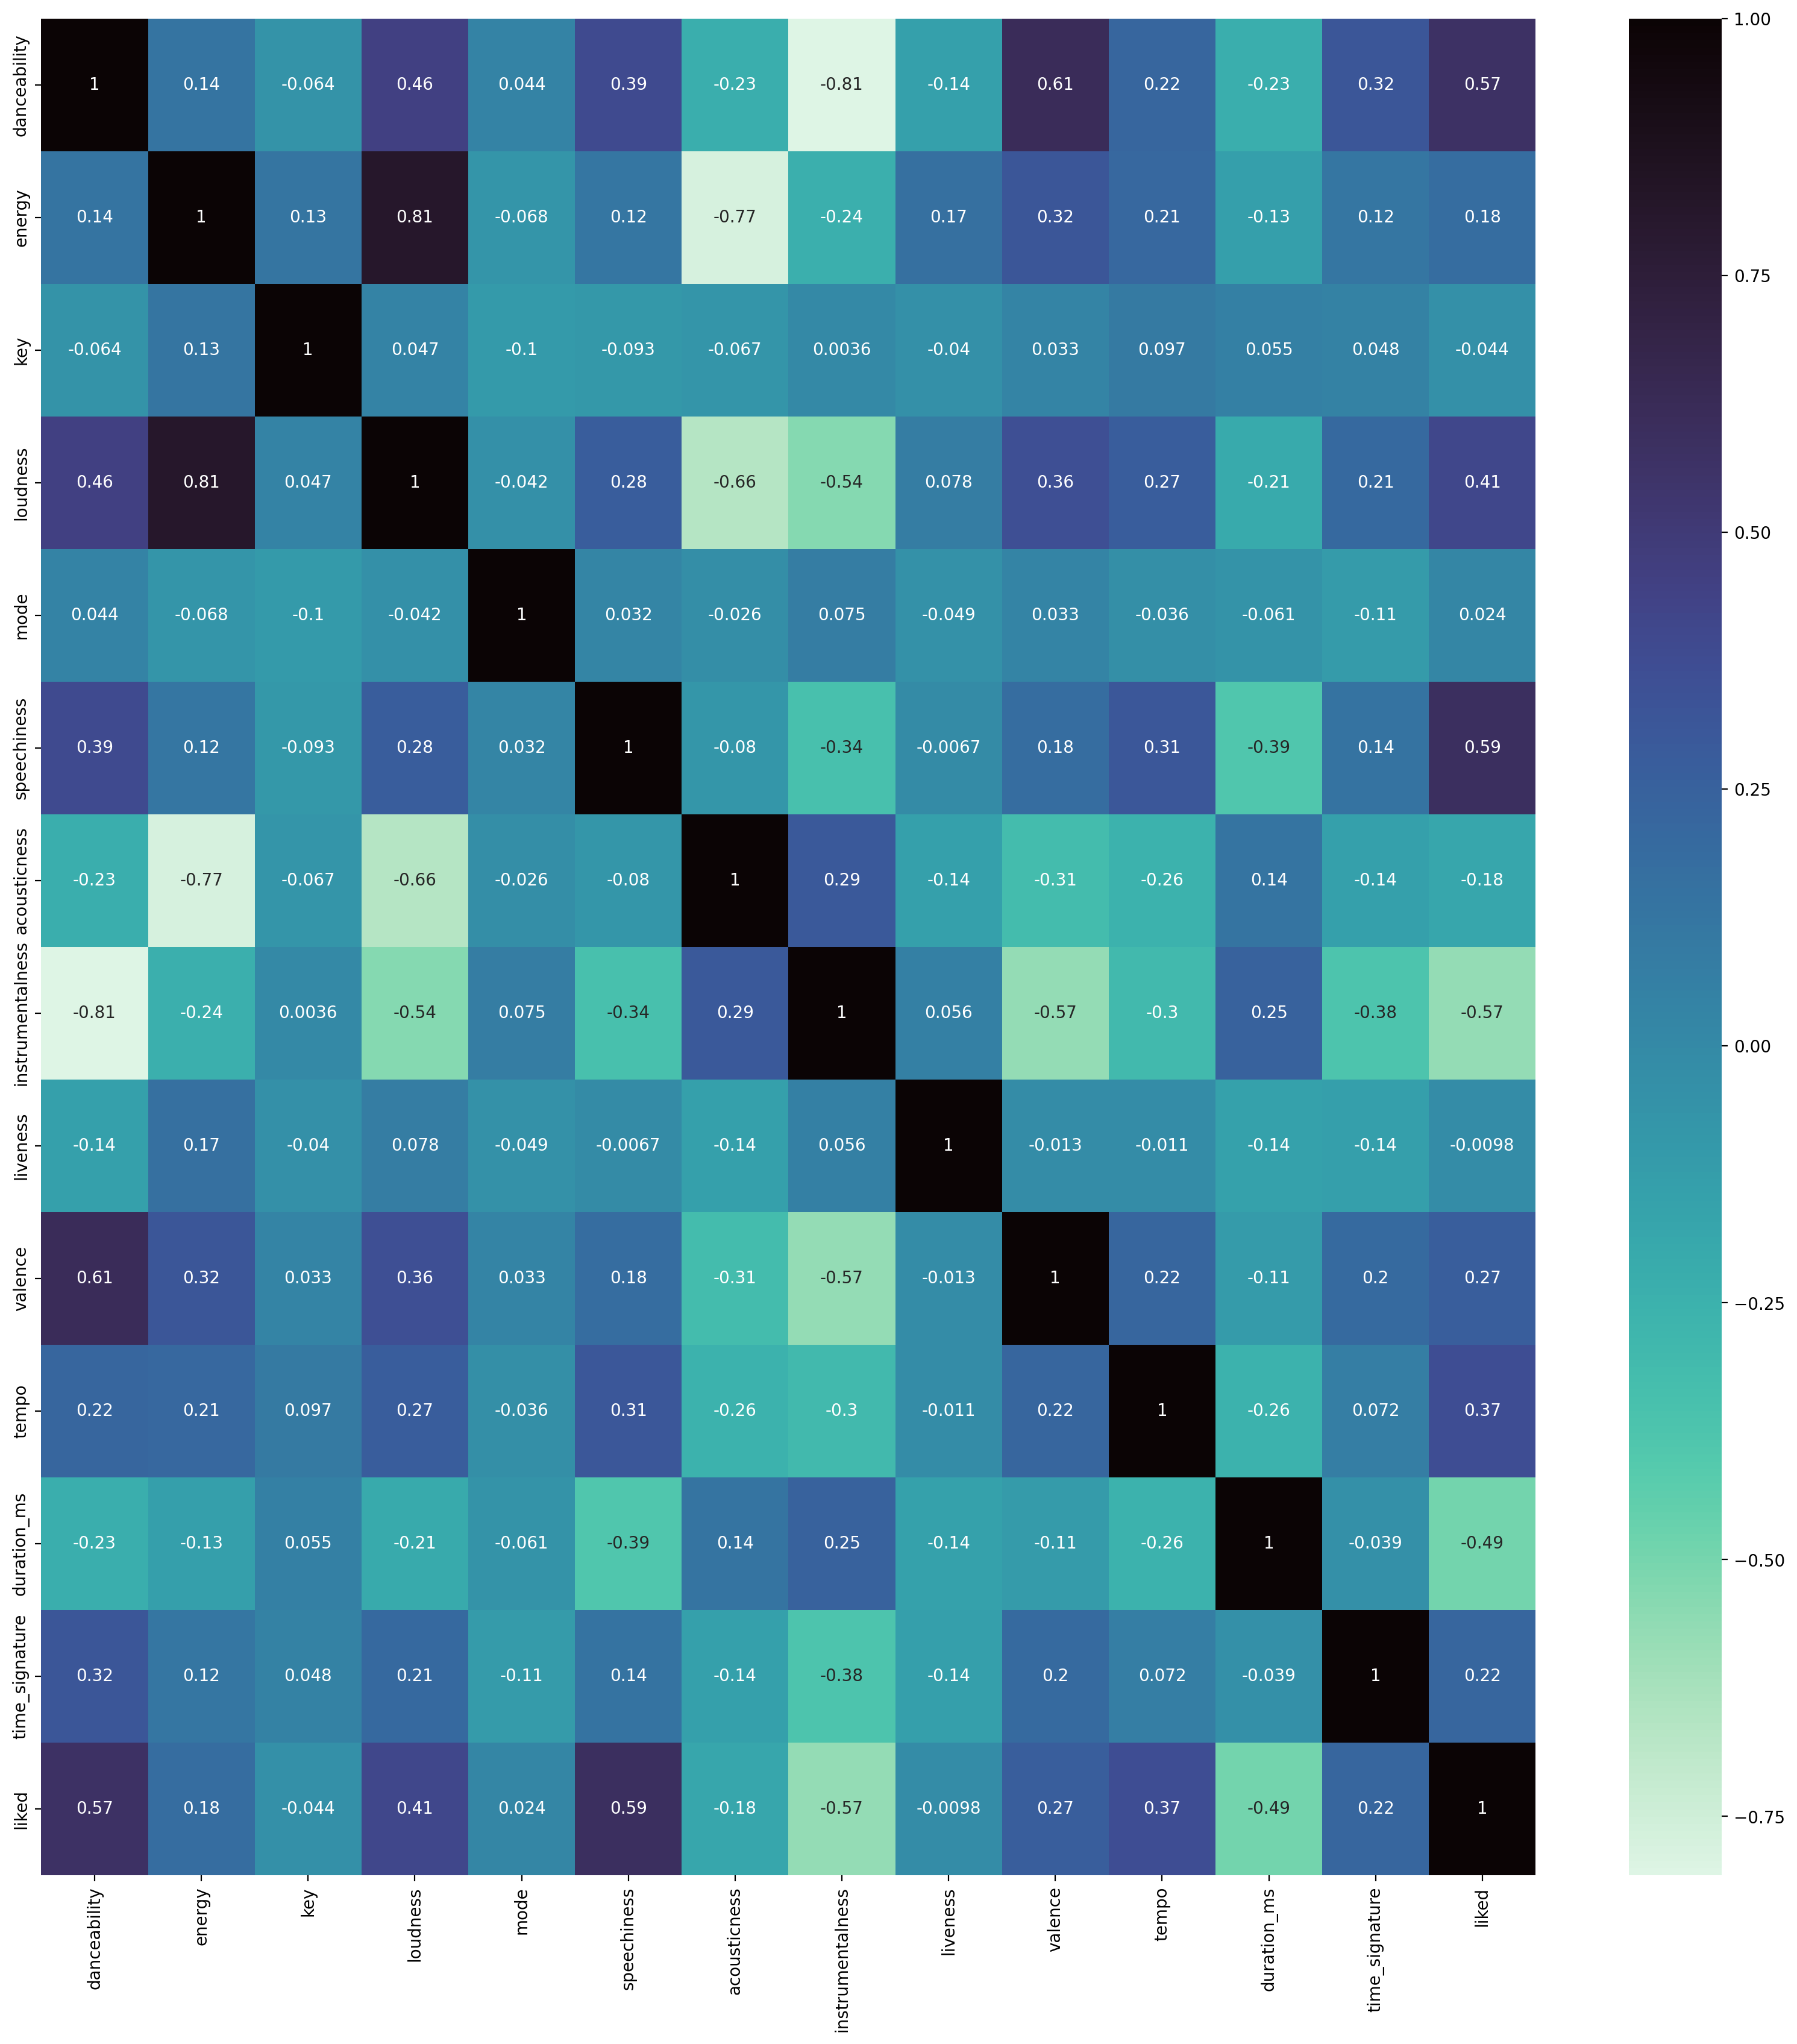

In [70]:
plt.figure(figsize = (20,20), dpi = 200)
sns.heatmap(
    spotify_df.corr(),
    annot = True,
    cmap='mako_r'
)

In [113]:
#La dropeamos porque no tiene casi nada de relación

spotify_df.drop(columns=['liveness'], axis = 1, inplace = True)

In [4]:
# Hago el copy del dataframe

df_train = spotify_df.copy()

Stantarisar

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# Separamos la variable dependiente
x_cols = list(set(df_train.columns)-set(['liked']))
y_col = ['liked']

# Convertimos nuestras variables en un array y seleccionamos las columnas
x = df_train[x_cols].values
y = df_train[y_col].values

# Usamos un algoritmo de seleccion para separar los datos de prueba y test
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Definimos el objeto de StandardScaler
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

# Estandarizamos las variables(StandarScaler)
x_train_sc = sc_x.transform(x_train)
x_test_sc = sc_x.transform(x_test)
y_train_sc = sc_y.transform(y_train)
y_test_sc = sc_y.transform(y_test)

# Definimos el objeto de RobustScaler
rs_x = RobustScaler().fit(x)
rs_y = RobustScaler().fit(y)

# Estandarizamos las variables(RobustScaler)
x_train_rs = rs_x.transform(x_train)
x_test_rs = rs_x.transform(x_test)
y_train_rs = rs_y.transform(y_train)
y_test_rs = rs_y.transform(y_test)

print(f'x_train: {x_train_rs.shape}, x_test: {x_test_rs.shape}, y_train: {y_train_rs.shape}, y_test: {y_test_rs.shape}')

x_train: (146, 13), x_test: (49, 13), y_train: (146, 1), y_test: (49, 1)


In [6]:
from sklearn.linear_model import LinearRegression

# Entrenamos el modelo de LinearRegression con los datos StandardScaler
model = LinearRegression()
model.fit(x_train_sc,y_train_sc)
y_pred_sc = model.predict(x_test_sc)

In [7]:
# Entrenamos el modelo de LinearRegression con los datos RobustScaler

model_rs = LinearRegression()
model.fit(x_train_rs,y_train_rs)
y_pred_rs = model.predict(x_test_rs)

In [8]:
from sklearn.linear_model import Ridge

# Entrenamos el modelo de Ridge con los datos RobustScaler
model_ri = Ridge()
model_ri.fit(x_train_rs,y_train_rs)
y_pred_rs_ri = model_ri.predict(x_test_rs)

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamos el modelo de DecisionTreeClassifier con los datos RobustScaler
ac = DecisionTreeClassifier(max_depth=10)
ac.fit(x_train_rs,y_train_rs)
y_pred_rs_ac = ac.predict(x_test_rs).reshape(-1, 1)

In [10]:
from sklearn.linear_model import LogisticRegression

# Entrenamos el modelo de DecisionTreeClassifier con los datos RobustScaler
lr = LogisticRegression()
lr.fit(x_train_rs,y_train_rs)
y_pred_rs_lr = lr.predict(x_test_rs).reshape(-1, 1)

/home/hytsh/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
poser = pd.DataFrame(y_test, columns=['True'])
poser['Arbol'] = rs_y.inverse_transform(y_pred_rs_ac)
poser['Logist'] = rs_y.inverse_transform(y_pred_rs_lr)
poser['Standar_test'] = sc_y.inverse_transform(y_pred_sc)
poser['Robuster_test'] = rs_y.inverse_transform(y_pred_rs)

poser

,True,Arbol,Logist,Standar_test,Robuster_test
0,1,1.0,0.0,0.683150,0.683150
1,1,1.0,1.0,0.826390,0.826390
2,0,0.0,0.0,0.451085,0.451085
3,1,0.0,1.0,0.547286,0.547286
4,0,0.0,0.0,0.186371,0.186371
5,1,1.0,1.0,0.766453,0.766453
6,1,0.0,1.0,1.003622,1.003622
7,1,1.0,1.0,0.564464,0.564464
8,0,0.0,0.0,0.419225,0.419225
9,0,0.0,0.0,0.079450,0.079450


In [12]:
import sklearn.metrics as metrics 

mse_sc = metrics.mean_squared_error(y_test_sc, y_pred_sc)
mse_rs = metrics.mean_squared_error(y_test_rs, y_pred_rs)

r2_sc = metrics.r2_score(y_test_sc, y_pred_sc)
r2_rs = metrics.r2_score(y_test_rs, y_pred_rs)

mse_rs_ri = metrics.mean_squared_error(y_test_rs, y_pred_rs_ri)
r2_sc_ri = metrics.r2_score(y_test_rs, y_pred_rs_ri)

mse_rs_ac = metrics.mean_squared_error(y_test_rs, y_pred_rs_ac)
r2_sc_ac = metrics.r2_score(y_test_rs, y_pred_rs_ac)

mse_rs_lr = metrics.mean_squared_error(y_test_rs, y_pred_rs_lr)
r2_sc_lr = metrics.r2_score(y_test_rs, y_pred_rs_lr)


print(f'StandarScaler MSE: {mse_sc.round(4)} StandarScaler R2: {r2_sc.round(4)}')
print(f'RobustScaler MSE: {mse_rs.round(4)} RobustScaler R2: {r2_rs.round(4)}')
print(f'RobustScaler R2_RI: {r2_sc.round(4)} RobustScaler MSE_RI: {mse_rs_ri.round(4)}')
print(f'RobustScaler R2_RI: {r2_sc_lr.round(4)} RobustScaler MSE_RI: {mse_rs_lr.round(4)}')
print(f'Arbol R2_ac: {r2_sc_ac.round(4)} Arbol MSE_ac: {mse_rs_ac.round(4)}')

StandarScaler MSE: 0.3962 StandarScaler R2: 0.583
RobustScaler MSE: 0.099 RobustScaler R2: 0.583
RobustScaler R2_RI: 0.583 RobustScaler MSE_RI: 0.0991
RobustScaler R2_RI: 0.6561 RobustScaler MSE_RI: 0.0816
Arbol R2_ac: 0.3982 Arbol MSE_ac: 0.1429


In [37]:
from sklearn.metrics import roc_auc_score

ac_ev = roc_auc_score(y_test_rs,y_pred_rs_ac)
lr_ev = roc_auc_score(y_test_rs,y_pred_rs_lr)

print(f'Arbol evaluacion: {ac_ev.round(4)} Logistic evaluacion: {lr_ev.round(4)}')

Arbol evaluacion: 0.8544 Logistic evaluacion: 0.9044


En la predicción de datos bivariados, la Regresion Logistica y Arbol de decición suelen ser más efectivos, con un poco de ventaja la regresión lienal y más constante

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5)

score = cross_val_score(lr,x_train_rs, y_train_rs, cv = kf, scoring = 'accuracy')
print("Media de cross_validation", score.mean())

Media de cross_validation 0.8832183908045976


/home/hytsh/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hytsh/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hytsh/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hytsh/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed w

In [46]:
preds = lr.predict(x_test_rs)

score_pred = metrics.accuracy_score(y_test_rs, preds)

print("Metrica en Test", score_pred)

Metrica en Test 0.9183673469387755


In [57]:
from sklearn import metrics
prediction_test = lr.predict(x_test_rs)
print(metrics.accuracy_score(y_test_rs,prediction_test ))

0.9183673469387755


In [61]:
lr.coef_

array([[ 0.79554997,  1.32791781, -0.41708563,  0.14322707,  0.30743921,
        -1.54945258,  0.13714491,  0.00903808,  1.93217158, -0.34299376,
        -0.88451573, -0.23375964, -0.03958689]])

Axes(0.125,0.11;0.775x0.77)


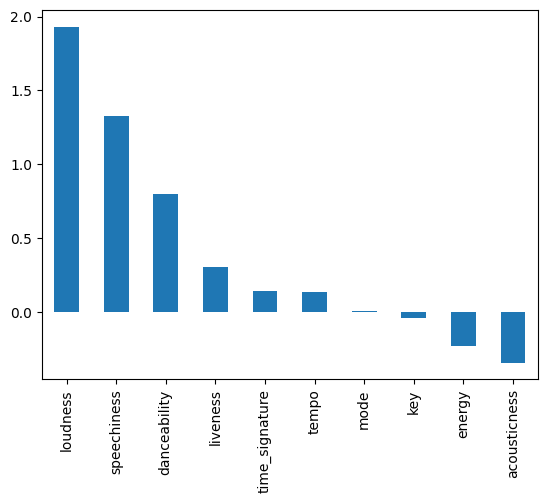

In [67]:
weights = pd.Series(lr.coef_[0],
                    index=df_train[x_cols].columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))